[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/instalacoes1/ProvaA-2022EAD.ipynb)

In [1]:
try:
    import CoolProp
except ModuleNotFoundError:
    import os
    os.system("pip install CoolProp")
    import CoolProp

PropsSI = CoolProp.CoolProp.PropsSI
Celsius0 = 273.15


Podemos obter as propriedades do fluido utilizando a função ```PropsSI```.
Há uma tabela de *inputs* dadas no link [Tabela de Parametros](http://www.coolprop.org/coolprop/HighLevelAPI.html#parameter-table)

```python
Temperature = PropsSI("T", "P", Pression,"Q", Titulo, Fluido)  # Kelvin
Entropy = PropsSI("SMASS", "P", Pression, "Q", Titulo, Fluido)  # J/kg
Enthalpy = PropsSI("HMASS", "P", Pression, "Q", Titulo, Fluido)  # J/kg

```

### Questão 1

Temos um ciclo de refrigeração por compressão a vapor. Os diagramas são dados abaixo.

<img src="https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes1/EsquemaCicloVapor.png?raw=true" alt="EsquemaCicloVapor" width="450px">

<img src="https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes1/TemperaturaEntropiaCicloVapor.png?raw=true" alt="EsquemaCicloVapor" width="300px">

<img src="https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes1/PressaoEntalpiaCicloVapor.png?raw=true" alt="EsquemaCicloVapor" width="300px">

A capacidade de refrigeração é de **5 kW**, isto é

$$
\dot{Q}_{f} = 5\ \text{kW} = 5 \cdot 10^{3} \ \text{W}
$$

In [2]:
Qfdot = 5000  # W

O fluido refrigerante utilizado será o **R134a**

In [3]:
fluido = "R134a"
# fluido = "R22"


As pressões de evaporação e condensação valem respectivamente **380 kPa** e **1500 kPa**. Logo

$$
P_{evap} = 380 \ \text{kPa} = 3.8 \cdot 10^{5} \ \text{Pa} 
$$
$$
P_{cond} = 1500 \ \text{kPa} = 15 \cdot 10^{5} \ \text{Pa}
$$

In [4]:
Pevap = 3.8e+5  # Pa
Pcond = 15e+5  # Pa

Dos diagrama observados, obtemos algumas equações que são dadas por:

#### Usando o diagrama $S \times T$

* $T_1 = T_{evap}$  (Equação 1)
* $T_3 = T_{cond}$ (Equação 2)
* $T_4 = T_{evap}$ (Equação 3)
* $s_1 = s_2$  (Equação 4)
* $x_{1} = 1$  (Equação 5)
* $x_{3} = 0$  (Equação 6)


#### Usando o diagrama $H \times P$

* $P_1 = P_{evap}$  (Equação 7)
* $P_2 = P_{cond}$  (Equação 8)
* $P_3 = P_{cond}$  (Equação 9)
* $P_4 = P_{evap}$  (Equação 10)
* $h_3 = h_4$  (Equação 11)

In [5]:
x1 = 1  # Equacao 5
x3 = 0  # Equacao 6
P1 = Pevap  # Equacao 7
P2 = Pcond  # Equacao 8
P3 = Pcond  # Equacao 9
P4 = Pevap  # Equacao 10

In [6]:
Tcond = PropsSI('T', 'P', P3,'Q', x3, fluido)
Tevap = PropsSI('T', 'P', P1,'Q', x1, fluido)
print("Temperatura de condensação: %.3f K = %.3f oC" % (Tcond, Tcond-Celsius0))
print("Temperatura de evaporação:  %.3f K = %.3f oC" % (Tevap, Tevap-Celsius0))

Temperatura de condensação: 328.383 K = 55.233 oC
Temperatura de evaporação:  280.567 K = 7.417 oC


In [7]:
T1 = Tevap  # Equacao 1
T3 = Tcond  # Equacao 2
T4 = Tevap  # Equacao 3

In [8]:
h1 = PropsSI("HMASS", "P", P1, "Q", x1, fluido)
s1 = PropsSI("SMASS", "P", P1, "Q", x1, fluido)
s2 = s1  # Equacao 4
h3 = PropsSI("HMASS", "P", P3, "Q", x3, fluido)
h4 = h3  # Equacao 11
h2 = PropsSI("HMASS", "P", P2, "SMASS", s2, fluido)
s3 = PropsSI("SMASS", "P", P3, "HMASS", h3, fluido)
s4 = PropsSI("SMASS", "P", P4, "HMASS", h4, fluido)

Calculamos os demais componentes do circuito

In [9]:
T2 = PropsSI("T", "P", P2, "HMASS", h2, fluido)
# x2 = PropsSI("Q", "P", P2, "HMASS", h2, fluido)  # Inexistente pois vapor superaquecido
x4 = PropsSI("Q", "P", P4, "HMASS", h4, fluido)

Mostrando então os resultados

In [10]:
print("Pressoes")
print("P1 = %.3f Pa" % P1)
print("P2 = %.3f Pa" % P2)
print("P3 = %.3f Pa" % P3)
print("P4 = %.3f Pa" % P4)

print("Temperaturas")
print("T1 = %.3f K = %.3f oC" % (T1, T1-Celsius0))
print("T2 = %.3f K = %.3f oC" % (T2, T2-Celsius0))
print("T3 = %.3f K = %.3f oC" % (T3, T3-Celsius0))
print("T4 = %.3f K = %.3f oC" % (T4, T4-Celsius0))

print("Titulos")
print("x1 = %.3f" % x1)
print("x2 = Vapor superaquecido")
print("x3 = %.3f" % x3)
print("x4 = %.3f" % x4)

print("Entalpias")
print("h1 = %.3f J/kg" % h1)
print("h2 = %.3f J/kg" % h2)
print("h3 = %.3f J/kg" % h3)
print("h4 = %.3f J/kg" % h4)

print("Entropias")
print("s1 = %.3f J/(kg*K)" % s1)
print("s2 = %.3f J/(kg*K)" % s2)
print("s3 = %.3f J/(kg*K)" % s3)
print("s4 = %.3f J/(kg*K)" % s4)

Pressoes
P1 = 380000.000 Pa
P2 = 1500000.000 Pa
P3 = 1500000.000 Pa
P4 = 380000.000 Pa
Temperaturas
T1 = 280.567 K = 7.417 oC
T2 = 333.142 K = 59.992 oC
T3 = 328.383 K = 55.233 oC
T4 = 280.567 K = 7.417 oC
Titulos
x1 = 1.000
x2 = Vapor superaquecido
x3 = 0.000
x4 = 0.362
Entalpias
h1 = 402866.622 J/kg
h2 = 431310.779 J/kg
h3 = 279838.967 J/kg
h4 = 279838.967 J/kg
Entropias
s1 = 1723.294 J/(kg*K)
s2 = 1723.294 J/(kg*K)
s3 = 1262.160 J/(kg*K)
s4 = 1284.798 J/(kg*K)


Agora, temos as três quantidades importantes para o sistema que são

* $w = h_{2} - h_1$  (Equação 12)
* $q_f = h_1 - h_4$  (Equação 13)
* $q_q = h_2 - h_3$  (Equação 14)

In [11]:
w = h2 - h1  # Equacao 12
qf = h1 - h4  # Equacao 13
qq = h2 - h3  # Equacao 14

print("Valores de calor do ciclo por unidade de massa:")
print("w  = %.3f J/kg" % w)
print("qf = %.3f J/kg" % qf)
print("qq = %.3f J/kg" % qq)

Valores de calor do ciclo por unidade de massa:
w  = 28444.157 J/kg
qf = 123027.655 J/kg
qq = 151471.812 J/kg


O **COP** é então dado pela equação

$$
\text{COP} = \dfrac{q_f}{w}
$$

In [12]:
COP = qf/w
print("COP = %.3f" % COP)

COP = 4.325


Agora calculamos o valor do fluxo de massa $\dot{m}$ dado por

$$
\dot{m} = \dfrac{\dot{Q}_{f}}{q_f}
$$

In [13]:
mdot = Qfdot/qf
print("mdot = %.3f kg/s" % (mdot))

mdot = 0.041 kg/s


E a vazão volumérica é dada por

$$
\dot{V} = \dfrac{\dot{m}}{\rho}
$$

Visto que o fluido muda de temperatura, de fase, ele também mudará sua massa específica $\rho$ e então a vazão volumétrica. Ou seja, iremos calcular a vazão para cada ponto.

In [14]:
rho1 = PropsSI('D', 'P', P1,'SMASS',s1, fluido)
rho2 = PropsSI('D', 'P', P2,'SMASS',s2, fluido)
rho3 = PropsSI('D', 'P', P3,'SMASS',s3, fluido)
rho4 = PropsSI('D', 'P', P4,'SMASS',s4, fluido)
V1dot = mdot/rho1
V2dot = mdot/rho2
V3dot = mdot/rho3
V4dot = mdot/rho4
cp1 = PropsSI("CP0MASS", "P", P1, "SMASS", s1, fluido)
cp2 = PropsSI("CP0MASS", "P", P2, "SMASS", s2, fluido)
cp3 = PropsSI("CP0MASS", "P", P3, "SMASS", s3, fluido)
cp4 = PropsSI("CP0MASS", "P", P4, "SMASS", s4, fluido)
clHPres = PropsSI("HMASS", "P", P3, "Q", 1, fluido) -  PropsSI("HMASS", "P", P3, "Q", 0, fluido)
clLPres = PropsSI("HMASS", "P", P4, "Q", 1, fluido) -  PropsSI("HMASS", "P", P4, "Q", 0, fluido) 

print("rho1 = %.3f kg/m^3" % rho1)
print("rho2 = %.3f kg/m^3" % rho2)
print("rho3 = %.3f kg/m^3" % rho3)
print("rho4 = %.3f kg/m^3" % rho4)
print("V1dot = %.3f m^3/s = %.3f L/s" % (V1dot, 1000*V1dot))
print("V2dot = %.3f m^3/s = %.3f L/s" % (V2dot, 1000*V2dot))
print("V3dot = %.3f m^3/s = %.3f L/s" % (V3dot, 1000*V3dot))
print("V4dot = %.3f m^3/s = %.3f L/s" % (V4dot, 1000*V4dot))
print("cp1 = %.3f J/(kg*K)" % cp1)
print("cp2 = %.3f J/(kg*K)" % cp2)
print("cp3 = %.3f J/(kg*K)" % cp3)
print("cp4 = %.3f J/(kg*K)" % cp4)
print("Calor latente Baixa pressao = %.3f J/kg" % clLPres)
print("Calor latente Alta pressao = %.3f J/kg" % clHPres)

rho1 = 18.575 kg/m^3
rho2 = 73.455 kg/m^3
rho3 = 1077.166 kg/m^3
rho4 = 50.027 kg/m^3
V1dot = 0.002 m^3/s = 2.188 L/s
V2dot = 0.001 m^3/s = 0.553 L/s
V3dot = 0.000 m^3/s = 0.038 L/s
V4dot = 0.001 m^3/s = 0.812 L/s
cp1 = 801.740 J/(kg*K)
cp2 = 894.417 J/(kg*K)
cp3 = 886.265 J/(kg*K)
cp4 = 801.740 J/(kg*K)
Calor latente Baixa pressao = 192824.664 J/kg
Calor latente Alta pressao = 145388.457 J/kg


Agora mostramos os gráficos do ciclo.
Para isso, usaremos as mesmas equações acima, mas utilizaremos $n$ valores entre cada passo.

In [15]:
import numpy as np
from matplotlib import pyplot as plt

PM = Pcond
TM = Tcond
xM = 1
hM = PropsSI("HMASS", "P", PM, "Q", xM, fluido)
sM = PropsSI("SMASS", "P", PM, "Q", xM, fluido)


n = 2**3 + 1


# Encontrar de 1 ate 2. S constante e T linear
s1to2 = s1 * np.ones(n)
T1to2 = np.linspace(T1, T2, n)
P1to2 = np.zeros(n)
h1to2 = np.zeros(n)
for i in range(n):
    P1to2[i] = PropsSI("P", "T", T1to2[i], "SMASS", s2, fluido)
    h1to2[i] = PropsSI("HMASS", "T", T1to2[i], "SMASS", s2, fluido)
    

# Encontrar de 2 ate M. P constante e H linear
P2toM = Pcond * np.ones(n)
h2toM = np.linspace(h2, hM, n)
T2toM = np.zeros(n)
s2toM = np.zeros(n)
for i in range(n):
    T2toM[i] = PropsSI("T", "P", P3, "HMASS", h2toM[i], fluido)
    s2toM[i] = PropsSI("SMASS", "P", P3, "HMASS", h2toM[i], fluido)
    
# Encontrar de M ate 3. P constante, T constante e X linear
PMto3 = Pcond * np.ones(n)
TMto3 = Tcond * np.ones(n)
xMto3 = np.linspace(1, 0, n)
hMto3 = np.zeros(n)
sMto3 = np.zeros(n)
for i in range(n):
    hMto3[i] = PropsSI("HMASS", "P", Pcond, "Q", xMto3[i], fluido)
    sMto3[i] = PropsSI("SMASS", "P", Pcond, "Q", xMto3[i], fluido)
    

# Encontrar de 3 ate 4. H constante e P linear
h3to4 = h3 * np.ones(n)
P3to4 = np.linspace(P3, P4, n)
T3to4 = np.zeros(n)
s3to4 = np.zeros(n)
x3to4 = np.zeros(n)
for i in range(n):
    T3to4[i] = PropsSI("T", "HMASS", h3, "P", P3to4[i], fluido)
    s3to4[i] = PropsSI("SMASS", "HMASS", h3, "P", P3to4[i], fluido)
    x3to4[i] = PropsSI("Q", "HMASS", h3, "P", P3to4[i], fluido)
    
# Encontrar de 4 ate 1. P constante, T constante e X linear
P4to1 = Pevap * np.ones(n)
T4to1 = Tevap * np.ones(n)
h4to1 = np.zeros(n)
s4to1 = np.zeros(n)
x4to1 = np.linspace(x4, 1, n)
for i in range(n):
    h4to1[i] = PropsSI("HMASS", "P", Pevap, "Q", x4to1[i], fluido)
    s4to1[i] = PropsSI("SMASS", "P", Pevap, "Q", x4to1[i], fluido)

In [16]:
t1, t2, t3, t4, t1r = 1, 2, 3, 4, 5
tM = ((h2-hM)*t3  + (hM-h3)*t2)/(h2-h3)
time1to2 = np.linspace(t1, t2, n)
time2toM = np.linspace(t2, tM, n)
timeMto3 = np.linspace(tM, t3, n)
time3to4 = np.linspace(t3, t4, n)
time4to1 = np.linspace(t4, t1r, n)
time = np.concatenate([time1to2, time2toM, timeMto3, time3to4, time4to1])
T = np.concatenate([T1to2, T2toM, TMto3, T3to4, T4to1])
P = np.concatenate([P1to2, P2toM, PMto3, P3to4, P4to1])
h = np.concatenate([h1to2, h2toM, hMto3, h3to4, h4to1])
s = np.concatenate([s1to2, s2toM, sMto3, s3to4, s4to1])
x = np.concatenate([xMto3, x3to4, x4to1])

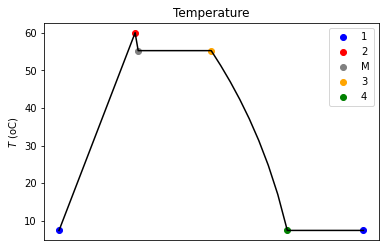

In [17]:
plt.figure(1)
plt.plot(time, T-Celsius0, color="black")
plt.scatter(t1, T1-Celsius0, label="1", color="blue")
plt.scatter(t2, T2-Celsius0, label="2", color="red")
plt.scatter(tM, TM-Celsius0, label="M", color="grey")
plt.scatter(t3, T3-Celsius0, label="3", color="orange")
plt.scatter(t4, T4-Celsius0, label="4", color="green")
plt.scatter(t1r, T1-Celsius0, color="blue")
plt.title("Temperature")
plt.ylabel(r"$T$ (oC)")
plt.xticks([])
plt.legend()

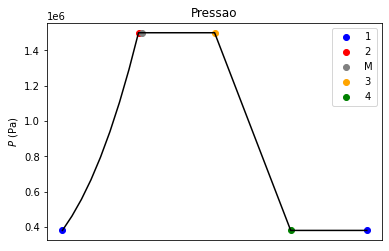

In [18]:
plt.figure(2)
plt.plot(time, P, color="black")
plt.scatter(t1, P1, label="1", color="blue")
plt.scatter(t2, P2, label="2", color="red")
plt.scatter(tM, PM, label="M", color="grey")
plt.scatter(t3, P3, label="3", color="orange")
plt.scatter(t4, P4, label="4", color="green")
plt.scatter(t1r, P1, color="blue")
plt.title("Pressao")
plt.ylabel(r"$P$ (Pa)")
plt.xticks([])
plt.legend()

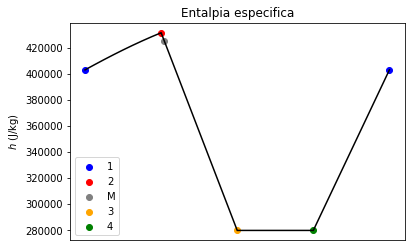

In [19]:
plt.figure(3)
plt.plot(time, h, color="black")
plt.scatter(t1, h1, label="1", color="blue")
plt.scatter(t2, h2, label="2", color="red")
plt.scatter(tM, hM, label="M", color="grey")
plt.scatter(t3, h3, label="3", color="orange")
plt.scatter(t4, h4, label="4", color="green")
plt.scatter(t1r, h1, color="blue")
plt.title("Entalpia especifica")
plt.ylabel(r"$h$ (J/kg)")
plt.xticks([])
plt.legend()

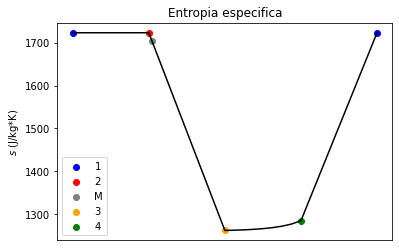

In [20]:
plt.figure(4)
plt.plot(time, s, color="black")
plt.scatter(t1, s1, label="1", color="blue")
plt.scatter(t2, s2, label="2", color="red")
plt.scatter(tM, sM, label="M", color="grey")
plt.scatter(t3, s3, label="3", color="orange")
plt.scatter(t4, s4, label="4", color="green")
plt.scatter(t1r, s1, color="blue")
plt.title("Entropia especifica")
plt.ylabel(r"$s$ (J/kg*K)")
plt.xticks([])
plt.legend()

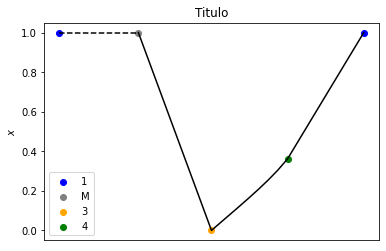

In [21]:
plt.figure(5)
timeliquido = np.concatenate([timeMto3, time3to4, time4to1])
plt.plot(timeliquido, x, color="black")
plt.scatter(t1, x1, label="1", color="blue")
plt.plot((t1, tM), (x1, xM), ls="dashed", color="black")
plt.scatter(tM, xM, label="M", color="grey")
plt.scatter(t3, x3, label="3", color="orange")
plt.scatter(t4, x4, label="4", color="green")
plt.scatter(t1r, x1, color="blue")
plt.title("Titulo")
plt.ylabel(r"$x$")
plt.xticks([])
plt.legend()

In [22]:
# Pegar os pontos criticos
try:
    m = 129
    Pcrit = PropsSI(fluido, 'Pcrit')
    Tcrit = PropsSI(fluido, 'Tcrit')
    Tmax = Tcrit - 1e-6
    try:
        Tmin = Tmax
        while True:
            PropsSI("P", "T", Tmin, "Q", 0, fluido)
            Tmin /= 2
    except Exception as e:
        Tmin *= 2
    Trange = np.linspace(Tmin, Tmax, m)
    Pleft = PropsSI("P", "T", Trange, "Q", 0, fluido)
    Pright = PropsSI("P", "T", Trange, "Q", 0, fluido)
    sleft = PropsSI("SMASS", "T", Trange, "Q", 0, fluido)
    sright = PropsSI("SMASS", "T", Trange, "Q", 1, fluido)
    hleft = PropsSI("HMASS", "T", Trange, "Q", 0, fluido)
    hright = PropsSI("HMASS", "T", Trange, "Q", 1, fluido)
    drawborder = True
    
except Exception as e:
    print("Could not draw border. Cause:")
    print(e)
    drawborder = False

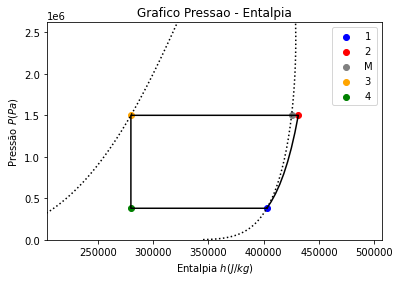

In [23]:
dP = np.max(P) - np.min(P)
Pmean = (np.max(P) + np.min(P))/2.
dh = np.max(h) - np.min(h)
hmean = (np.max(h) + np.min(h))/2.
fatorx = 1
fatory = 1.5

Pmin = np.max([Pmean - fatory*dP, 0])
Pmax = Pmean + fatory*dP

plt.figure(6)
plt.plot(h, P, color="black")
plt.scatter(h1, P1, label="1", color="blue")
plt.scatter(h2, P2, label="2", color="red")
plt.scatter(hM, PM, label="M", color="grey")
plt.scatter(h3, P3, label="3", color="orange")
plt.scatter(h4, P4, label="4", color="green")
if drawborder:
    plt.plot(hleft, Pleft, ls="dotted", color="black")
    plt.plot(hright, Pleft, ls="dotted", color="black")
plt.title("Grafico Pressao - Entalpia")
plt.xlabel(r"Entalpia $h (J/kg)$")
plt.ylabel(r"Pressão $P (Pa)$")
plt.xlim([hmean-fatorx*dh, hmean+fatorx*dh])
plt.ylim([Pmin, Pmax])
plt.legend()

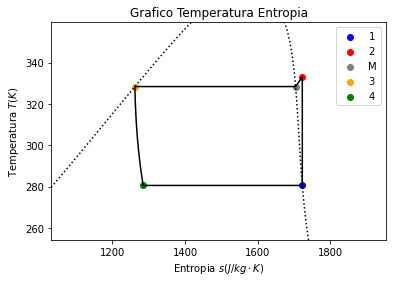

In [24]:
dT = np.max(T) - np.min(T)
Tmean = (np.max(T) + np.min(T))/2.
ds = np.max(s) - np.min(s)
smean = (np.max(s) + np.min(s))/2.
fatorx = 1
fatory = 1

Tmin = np.max([Tmean-fatory*dT, 0])
Tmax = Tmean+fatory*dT 

plt.figure(7)
plt.plot(s, T, color="black")
plt.scatter(s1, T1, label="1", color="blue")
plt.scatter(s2, T2, label="2", color="red")
plt.scatter(sM, TM, label="M", color="grey")
plt.scatter(s3, T3, label="3", color="orange")
plt.scatter(s4, T4, label="4", color="green")
if drawborder:
    plt.plot(sleft, Trange, ls="dotted", color="black")
    plt.plot(sright, Trange, ls="dotted", color="black")
plt.title("Grafico Temperatura Entropia")
plt.xlabel(r"Entropia $s (J/kg\cdot K)$")
plt.ylabel(r"Temperatura $T (K)$")
plt.xlim([smean-fatorx*ds, smean+fatorx*ds])
plt.ylim([Tmin, Tmax])
plt.legend()

In [25]:
print("Todas as informacoes")
print("Fluido: " + fluido)
print("Temperatura de condensação: %.3f K = %.3f oC" % (Tcond, Tcond-Celsius0))
print("Temperatura de evaporação:  %.3f K = %.3f oC" % (Tevap, Tevap-Celsius0))
print("Pressao de condensação: %.3f Pa = %.3f kPa" % (Pcond, Pcond/1000))
print("Pressao de evaporação:  %.3f Pa = %.3f kPa" % (Pevap, Pevap/1000))
print("")
print("Pressoes")
print("P1 = %.3f Pa = %.3f kPa" % (P1, P1/1000))
print("P2 = %.3f Pa = %.3f kPa" % (P2, P2/1000))
print("PM = %.3f Pa = %.3f kPa" % (PM, PM/1000))
print("P3 = %.3f Pa = %.3f kPa" % (P3, P3/1000))
print("P4 = %.3f Pa = %.3f kPa" % (P4, P4/1000))
print("")
print("Temperaturas")
print("T1 = %.3f K = %.3f oC" % (T1, T1-Celsius0))
print("T2 = %.3f K = %.3f oC" % (T2, T2-Celsius0))
print("TM = %.3f K = %.3f oC" % (TM, TM-Celsius0))
print("T3 = %.3f K = %.3f oC" % (T3, T3-Celsius0))
print("T4 = %.3f K = %.3f oC" % (T4, T4-Celsius0))
print("")
print("Titulos")
print("x1 = %.3f" % x1)
print("x2 = Vapor superaquecido")
print("xM = %.3f" % xM)
print("x3 = %.3f" % x3)
print("x4 = %.3f" % x4)
print("")
print("Entalpias")
print("h1 = %.3f J/kg" % h1)
print("h2 = %.3f J/kg" % h2)
print("hM = %.3f J/kg" % hM)
print("h3 = %.3f J/kg" % h3)
print("h4 = %.3f J/kg" % h4)
print("")
print("Entropias")
print("s1 = %.3f J/(kg*K)" % s1)
print("s2 = %.3f J/(kg*K)" % s2)
print("sM = %.3f J/(kg*K)" % sM)
print("s3 = %.3f J/(kg*K)" % s3)
print("s4 = %.3f J/(kg*K)" % s4)
print("")
print("Valores de calor do ciclo por unidade de massa:")
print("w  = %.3f J/kg" % w)
print("qf = %.3f J/kg" % qf)
print("qq = %.3f J/kg" % qq)
print("Valores de calor do ciclo:")
print("W  = %.3f J = %.3f kJ" % (w*mdot, w*mdot/1000))
print("Qf = %.3f J = %.3f kJ" % (qf*mdot, qf*mdot/1000))
print("QQ = %.3f J = %.3f kJ" % (qq*mdot, qq*mdot/1000))
print("")
print("mdot = %.3f kg/s" % mdot)
print("rho1 = %.3f kg/m^3" % rho1)
print("rho2 = %.3f kg/m^3" % rho2)
print("rho3 = %.3f kg/m^3" % rho3)
print("rho4 = %.3f kg/m^3" % rho4)
print("V1dot = %.3f m^3/s = %.3f L/s" % (V1dot, 1000*V1dot))
print("V2dot = %.3f m^3/s = %.3f L/s" % (V2dot, 1000*V2dot))
print("V3dot = %.3f m^3/s = %.3f L/s" % (V3dot, 1000*V3dot))
print("V4dot = %.3f m^3/s = %.3f L/s" % (V4dot, 1000*V4dot))
print("cp1 = %.3f J/(kg*K)" % cp1)
print("cp2 = %.3f J/(kg*K)" % cp2)
print("cp3 = %.3f J/(kg*K)" % cp3)
print("cp4 = %.3f J/(kg*K)" % cp4)
print("Calor latente Baixa pressao = %.3f J/kg" % clLPres)
print("Calor latente Alta pressao = %.3f J/kg" % clHPres)

Todas as informacoes
Fluido: R134a
Temperatura de condensação: 328.383 K = 55.233 oC
Temperatura de evaporação:  280.567 K = 7.417 oC
Pressao de condensação: 1500000.000 Pa = 1500.000 kPa
Pressao de evaporação:  380000.000 Pa = 380.000 kPa

Pressoes
P1 = 380000.000 Pa = 380.000 kPa
P2 = 1500000.000 Pa = 1500.000 kPa
PM = 1500000.000 Pa = 1500.000 kPa
P3 = 1500000.000 Pa = 1500.000 kPa
P4 = 380000.000 Pa = 380.000 kPa

Temperaturas
T1 = 280.567 K = 7.417 oC
T2 = 333.142 K = 59.992 oC
TM = 328.383 K = 55.233 oC
T3 = 328.383 K = 55.233 oC
T4 = 280.567 K = 7.417 oC

Titulos
x1 = 1.000
x2 = Vapor superaquecido
xM = 1.000
x3 = 0.000
x4 = 0.362

Entalpias
h1 = 402866.622 J/kg
h2 = 431310.779 J/kg
hM = 425227.424 J/kg
h3 = 279838.967 J/kg
h4 = 279838.967 J/kg

Entropias
s1 = 1723.294 J/(kg*K)
s2 = 1723.294 J/(kg*K)
sM = 1704.901 J/(kg*K)
s3 = 1262.160 J/(kg*K)
s4 = 1284.798 J/(kg*K)

Valores de calor do ciclo por unidade de massa:
w  = 28444.157 J/kg
qf = 123027.655 J/kg
qq = 151471.812 J/kg
V

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/instalacoes1/ProvaA-2022EAD.ipynb](https://github.com/carlos-adir/UnB-Courses/blob/main/instalacoes1/ProvaA-2022EAD.ipynb)